# Question 2

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

plt.close("all")
### CHANGE PATH TO WHEREVER YOU SAVE THE DATA FILES ### 
data = np.load("heart_disease_data.npz") 

In [64]:
# Function that outputs the position of x that contain val
def ind_x_eq_val(x, val):
    return np.where(x==val)[0]


# Function that counts the number of entries equal to val in x
def count_x_eq_val(x, val):
    return len(ind_x_eq_val(x, val))/float(len(x))
    

# Function that computes a Gaussian pdf with mean mu and std sig at the values in x
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)


# Estimate the pmf of H

P_H0 = float(count_x_eq_val(data['heart_disease'],0))
P_H1 = float(count_x_eq_val(data['heart_disease'],1))

# Estimate the conditional pmf of S given H
P_S_H0 = np.zeros(2)
P_S_H1 = np.zeros(2)
for ind_S in range(2):
    P_S_H0[ind_S] = float(count_x_eq_val(data['sex'][(data['heart_disease'] == 0)], ind_S))
    P_S_H1[ind_S] = float(count_x_eq_val(data['sex'][(data['heart_disease'] == 1)], ind_S))

# Estimate the conditional pmf of C given H
P_C_H0 = np.zeros(4)
P_C_H1 = np.zeros(4)
for ind_C in range(4):
    P_C_H0[ind_C] = float(count_x_eq_val(data['chest_pain'][(data['heart_disease'] == 0)], ind_C))
    P_C_H1[ind_C] = float(count_x_eq_val(data['chest_pain'][(data['heart_disease'] == 1)], ind_C))

# MAP estimate
MAP_estimate_S_C = np.zeros(50) + (P_S_H0[(data['sex_test'].astype(int))]*P_C_H0[(data['chest_pain_test'].astype(int))]*P_H0 < P_S_H1[(data['sex_test'].astype(int))]*P_C_H1[(data['chest_pain_test'].astype(int))]*P_H1)
            
error_rate_S_C = float((MAP_estimate_S_C != data['heart_disease_test']).sum())/50.0

print "Probability of error " + str(error_rate_S_C)

Probability of error 0.18


[ 245.57264957  254.02970297] [ 2164.17634597  2026.70208803] [ 46.52070879  45.01890812]
7
Probability of error using cholesterol 0.14


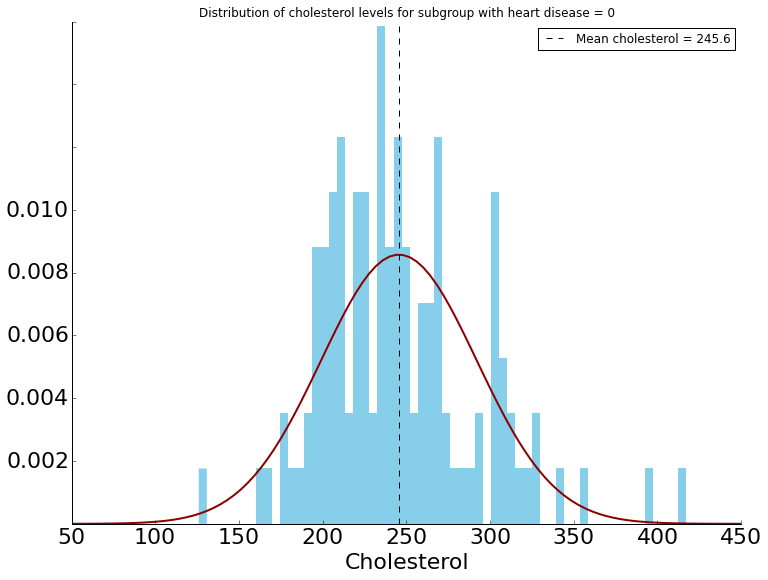

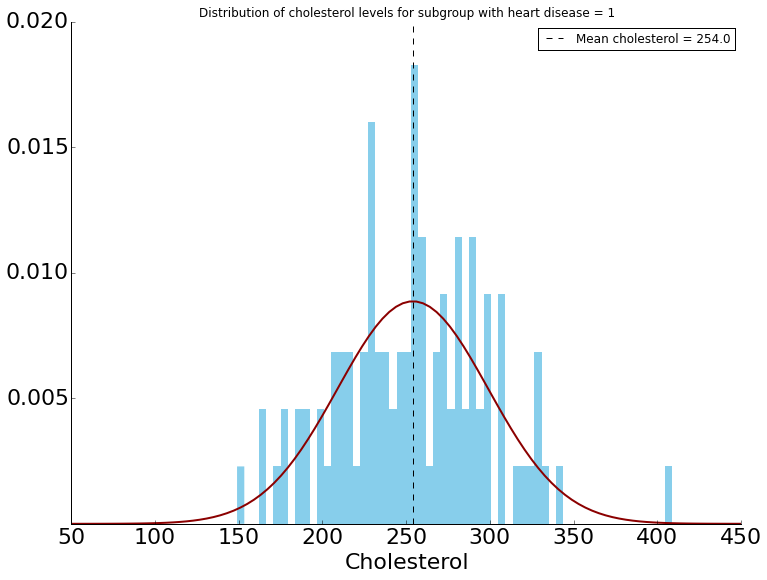

In [62]:
%matplotlib inline

## Estimate conditional pdf of X given H
mean_X_H = np.zeros(2)
std_X_H = np.zeros(2)
mean_X_H[0]= (data['cholesterol'][(data['heart_disease'] == 0)]).mean()
std_X_H[0] = (data['cholesterol'][(data['heart_disease'] == 0)]).std()
mean_X_H[1]= (data['cholesterol'][(data['heart_disease'] == 1)]).mean()
std_X_H[1] = (data['cholesterol'][(data['heart_disease'] == 1)]).std()

print mean_X_H, np.array(std_X_H)**2, std_X_H

n_plot = 100
for i in range(2):
    plt.figure(figsize=(12, 9))  
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False) 
    plt.xticks(fontsize=22) 
    plt.yticks(fontsize=22) 
    plt.xlabel("Cholesterol", fontsize=22)
    title = 'Distribution of cholesterol levels for subgroup with heart disease = ' + str(i)
    plt.title(title)
    plt.hist(data['cholesterol'][(data['heart_disease'] == i)],
             60,normed=True,edgecolor = "none", color="skyblue")
    plt.plot(np.linspace(50, 450, n_plot),gaussian(np.linspace(50, 450, n_plot), 
                     mean_X_H[i], std_X_H[i]), color="darkred", lw=2)
    label_mean = 'Mean cholesterol = ' + str(round(mean_X_H[i],1))
    plt.axvline(x=mean_X_H[i], color='k', linestyle='--', label=label_mean)
    plt.legend()
    plot = plt.gcf()
    save_name = 'distribution_for_HD_' + str(i)
    plot.savefig(save_name)

# MAP estimate
MAP_estimate_S_C_X = np.zeros(50) + (P_S_H0[(data['sex_test'].astype(int))]*P_C_H0[(data['chest_pain_test'].astype(int))]*gaussian(data['cholesterol_test'], mean_X_H[0], std_X_H[0])*P_H0 < P_S_H1[(data['sex_test'].astype(int))]*P_C_H1[(data['chest_pain_test'].astype(int))]*gaussian(data['cholesterol_test'], mean_X_H[1], std_X_H[1])*P_H1)

print (MAP_estimate_S_C_X != data['heart_disease_test']).sum()
error_rate_S_C_X = float((MAP_estimate_S_C_X != data['heart_disease_test']).sum())/50.0
print "Probability of error using cholesterol " + str(error_rate_S_C_X)